* * *
<pre> NYU Paris            <i> Artificial intelligence - Summer 2023 </i></pre>
* * *


<h1 align="center"> Lab 8: Graphs and networks in machine learning  </h1>

<pre align="left"> June 28th 2023               <i> Author: Hicham Janati </i></pre>
* * *





# Part I: Introduction to Networkx

Networks (or graphs) are a very powerful tool through which one can model relationships and structure data with a lot of flexibility. A graph is a collection of nodes (elements of some set) that may or may not be connected by an edge. The purpose of this first section is to get familiar with manipulating graphs using Networkx. We start with a simple examples of the parisian subway:
![metro](img/metro.png)


In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Part II: graph clustering

We start by introducing two concepts:

### A)  - Betweeness centrality
The shortest path between nodes can be used to define the concept (quantity) of betweeness centrality of an edge. An edge has high _betweeness centrality_ if among all possible shortest paths between _all_ the nodes of the graph
a large proportion includes it. Consider the case of a network with two islands linked by a bridge. The edge conssituting the bridge would be present in any shortest path between nodes from different islands:

### B) - Node importance
The importance (or degree) of a node can be defined as the total number of edges (weighted or not) it has. We can display nodes with size proportional to their importance. The argument `nodelist` can also be used to plot a subset of the graph.

## Game of thrones communities

You are now ready to apply this concepts to a real dataset consisting of interactions between Game of thrones characters. Two characters (nodes) interact if they are mentioned within 15 consecutive words in a GOT book.

In [2]:
import pandas as pd
df = pd.read_csv("asoiaf-book1-edges.csv")
df

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


In [3]:
def got_graph(book_id):
    df = pd.read_csv(f"https://aiteachings.github.io/NYU-AI-Fall22/static_files/data/got/asoiaf-book{book_id}-edges.csv")
    graph = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr=['weight'])
    return graph

graph1 = got_graph(1)

We create a graph from this edges datasets:

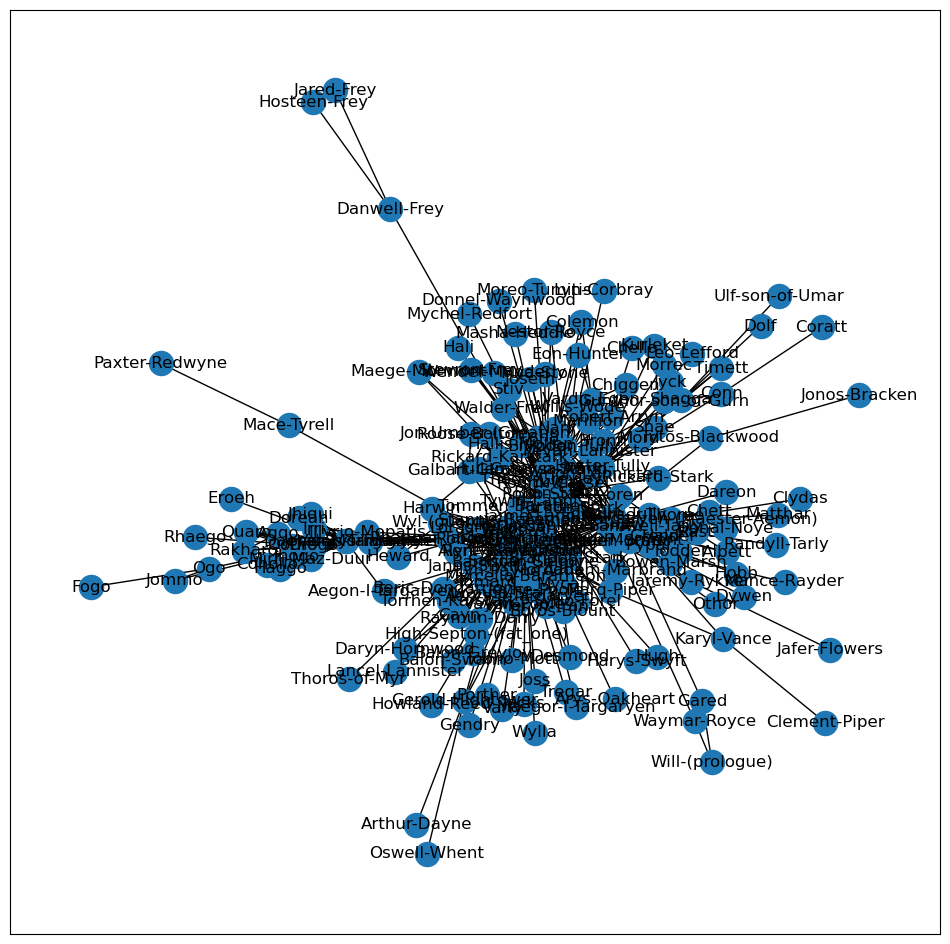

In [4]:
plt.figure(figsize=(12, 12)) 
nx.draw_networkx(graph1, with_labels=True)
plt.show()

### Question 5:
Find the top 10 important characters.

_Tip: Find a smart way to sort a dictionary by looking up the extra args of `dict`_

In [5]:
#Unweighted case
degree_unweighted_1 = graph1.degree()

sorted_degree_unweighted_1 = sorted(degree_unweighted_1, key=lambda item: item[1], reverse=True)[:10]
for character, degree in sorted_degree_unweighted_1:
    print(f'{character}: {degree}')


Eddard-Stark: 66
Robert-Baratheon: 50
Tyrion-Lannister: 46
Catelyn-Stark: 43
Jon-Snow: 37
Robb-Stark: 35
Sansa-Stark: 35
Bran-Stark: 32
Cersei-Lannister: 30
Joffrey-Baratheon: 30


In [6]:
#Weighted case
degree_weighted_1 = graph1.degree(weight='weight')

sorted_degree_weighted_1 = sorted(degree_weighted_1, key=lambda item: item[1], reverse=True)[:10]
for character, degree in sorted_degree_weighted_1:
    print(f'{character}: {degree}')


Eddard-Stark: 1284
Robert-Baratheon: 941
Jon-Snow: 784
Tyrion-Lannister: 650
Sansa-Stark: 545
Bran-Stark: 531
Catelyn-Stark: 520
Robb-Stark: 516
Daenerys-Targaryen: 443
Arya-Stark: 430


### Question 6:
Visualize the graph of the top 10 important characters.

_Tip: Create a subgraph_.

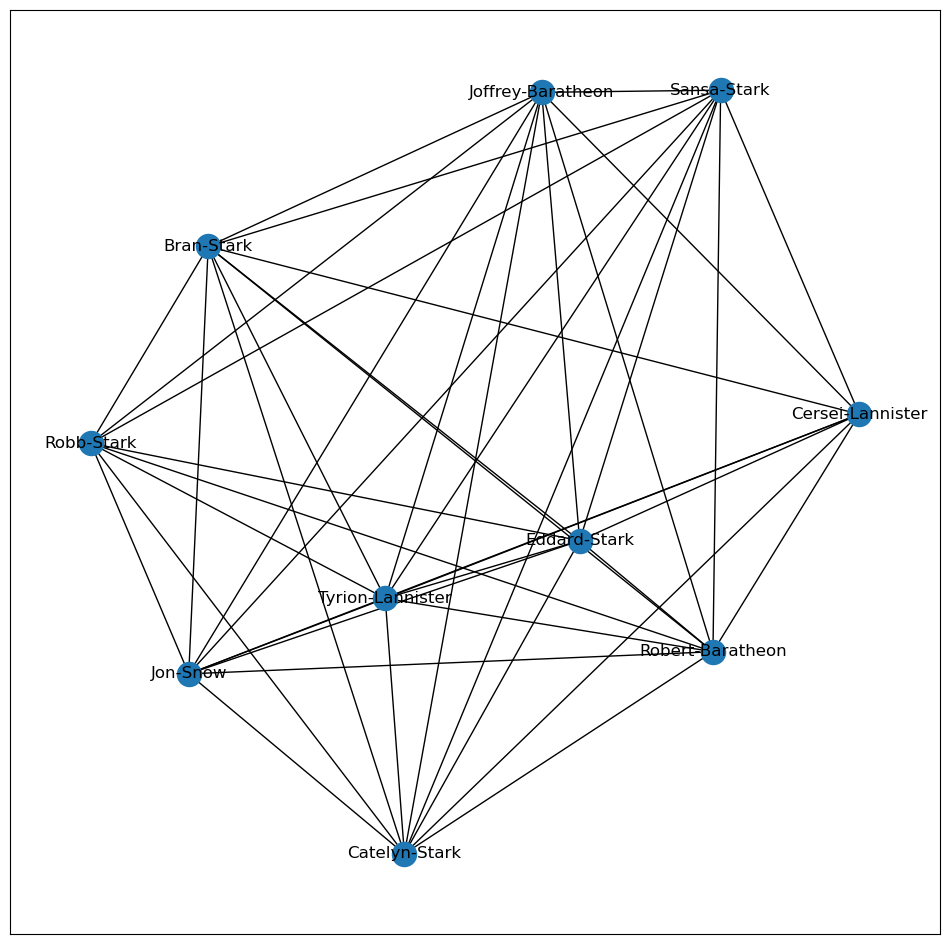

In [7]:
#Unweighted Visualization
top_characters_unweighted_1= [character for character, degree in sorted_degree_unweighted_1]
subgraph_unweighted_1 = graph1.subgraph(top_characters_unweighted_1)

plt.figure(figsize=(12, 12))
nx.draw_networkx(subgraph_unweighted_1, with_labels=True)
plt.show()

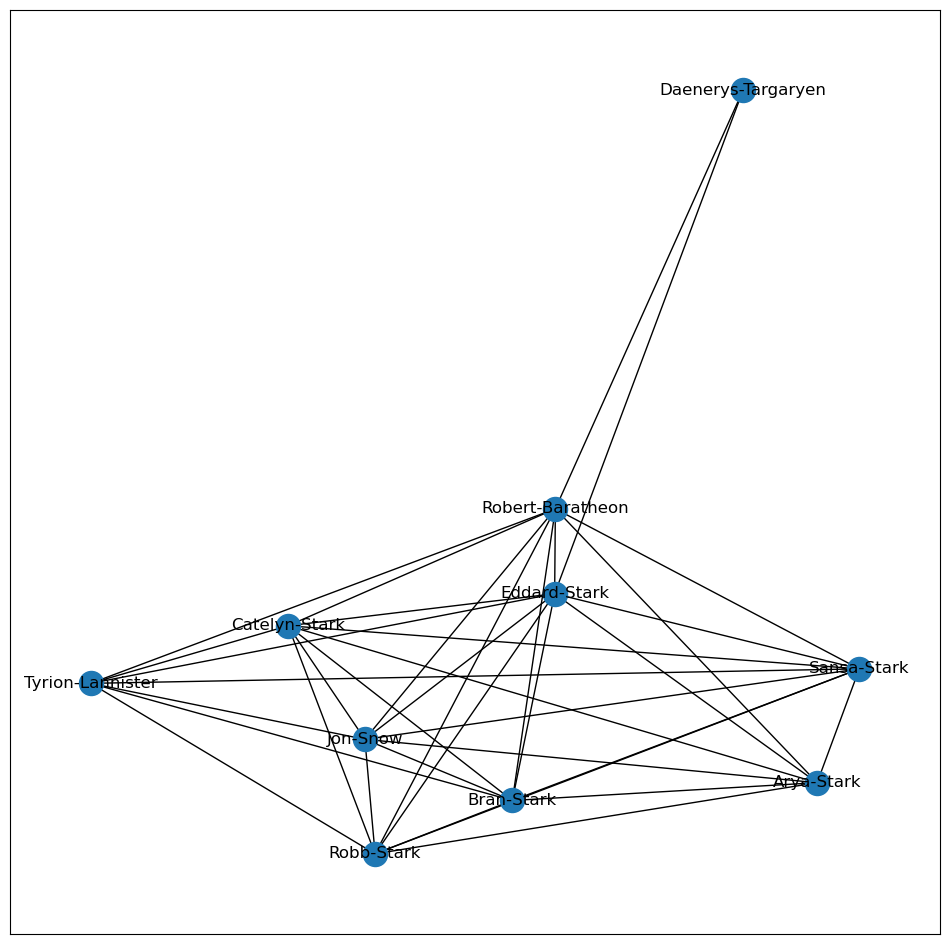

In [8]:
#Weighted Visualization
top_characters_weighted_1= [character for character, degree in sorted_degree_weighted_1]
subgraph_weighted_1 = graph1.subgraph(top_characters_weighted_1)

plt.figure(figsize=(12, 12))
nx.draw_networkx(subgraph_weighted_1, with_labels=True)
plt.show()



### Question 7
Read the dataset of the five books. Does this top 10 evolve as expected from the series ?

In [9]:
graph2 = got_graph(2)
graph3 = got_graph(3)
graph4 = got_graph(4)
graph5 = got_graph(5)

In [10]:
G_all = nx.compose(graph2, graph1)
G_all = nx.compose(G_all, graph3)
G_all = nx.compose(G_all, graph4)
G_all = nx.compose(G_all, graph5)

In [11]:
degree_weighted_all = G_all.degree(weight='weight')
sorted_degree_weighted_all = sorted(degree_weighted_all, key=lambda item: item[1], reverse=True)[:10]

for character, degree in sorted_degree_weighted_all:
    print(f'{character}: {degree}')


Tyrion-Lannister: 1144
Jon-Snow: 1143
Daenerys-Targaryen: 894
Arya-Stark: 734
Jaime-Lannister: 688
Eddard-Stark: 641
Stannis-Baratheon: 637
Cersei-Lannister: 625
Robb-Stark: 508
Catelyn-Stark: 484


In [12]:
#Unweighted case
degree_unweighted_all = G_all.degree()

sorted_degree_unweighted_all = sorted(degree_unweighted_all, key=lambda item: item[1], reverse=True)[:10]
for character, degree in sorted_degree_unweighted_all:
    print(f'{character}: {degree}')

Tyrion-Lannister: 122
Jon-Snow: 114
Jaime-Lannister: 101
Cersei-Lannister: 97
Stannis-Baratheon: 89
Arya-Stark: 84
Sansa-Stark: 75
Catelyn-Stark: 75
Eddard-Stark: 74
Robb-Stark: 74


Yes, I think all characters are expected. I didn't watch GOT before but I searched the relationship graph online. The Lannister, Baratheon, and Stark are three important families in the book and Jon-Snow's real name is Aegon Targraymen, which is the family name appearing in the weighted case. 

### Question 8
Repeat question 6-7 but for the betweeness-centrality score. Does it make sense to use `weight` here ?

In [14]:
# Calculate the betweenness centrality of each character(Weighted)
centrality_1 = nx.betweenness_centrality(graph1, weight='weight')

sorted_centrality_1 = sorted(centrality_1.items(), key=lambda item: item[1], reverse=True)[:10]

for character, centrality in sorted_centrality_1:
    print(f'{character}: {centrality}')


Robert-Baratheon: 0.23341885664466297
Eddard-Stark: 0.18703429235687297
Tyrion-Lannister: 0.15311225972516293
Robb-Stark: 0.1024018949825402
Catelyn-Stark: 0.10169012330302643
Jon-Snow: 0.09027684366394043
Jaime-Lannister: 0.07745109164464009
Rodrik-Cassel: 0.07667992877670296
Drogo: 0.06894355184677767
Jorah-Mormont: 0.0627085149665795


In [13]:
#Unweighted
centrality_1 = nx.betweenness_centrality(graph1)

sorted_centrality_1 = sorted(centrality_1.items(), key=lambda item: item[1], reverse=True)[:10]

for character, centrality in sorted_centrality_1:
    print(f'{character}: {centrality}')

Eddard-Stark: 0.2696038913836117
Robert-Baratheon: 0.21403028397371796
Tyrion-Lannister: 0.1902124972697492
Jon-Snow: 0.17158135899829566
Catelyn-Stark: 0.1513952715347627
Daenerys-Targaryen: 0.08627015537511595
Robb-Stark: 0.07298399629664767
Drogo: 0.06481224290874964
Bran-Stark: 0.05579958811784442
Sansa-Stark: 0.03714483664326785


In [15]:
#Inverse weighted
for u, v, data in graph1.edges(data=True):
    data['distance'] = 1 / data['weight']
    
centrality_1 = nx.betweenness_centrality(graph1, weight='distance')
sorted_centrality_1 = sorted(centrality_1.items(), key=lambda item: item[1], reverse=True)[:10]

for character, centrality in sorted_centrality_1:
    print(f'{character}: {centrality}')


Eddard-Stark: 0.5926474861958733
Catelyn-Stark: 0.36855565242662014
Jon-Snow: 0.3514094739901191
Robert-Baratheon: 0.3329991281604185
Tyrion-Lannister: 0.27137460040685846
Daenerys-Targaryen: 0.202615518744551
Bran-Stark: 0.0945655332752107
Robb-Stark: 0.09177564661435629
Arya-Stark: 0.06939843068875327
Sansa-Stark: 0.06870095902353966


The weight doesn't make sense here. If needed, we should use the inverse of weight.
A higher edge weight actually implies a stronger or more frequent interaction. If I apply a betweenness centrality algorithm directly in this case, it might interpret these strong interactions as "long distances", which is not what we want.
To resolve this, we should invert the weights before running the algorithm. This means creating a new attribute (for example, 'distance') where distance = 1 / weight. The betweenness centrality algorithm can then use this 'distance' attribute. This way, frequent interactions (high weight, low distance) will be rightly interpreted as "short distances", and infrequent interactions (low weight, high distance) as "long distances".

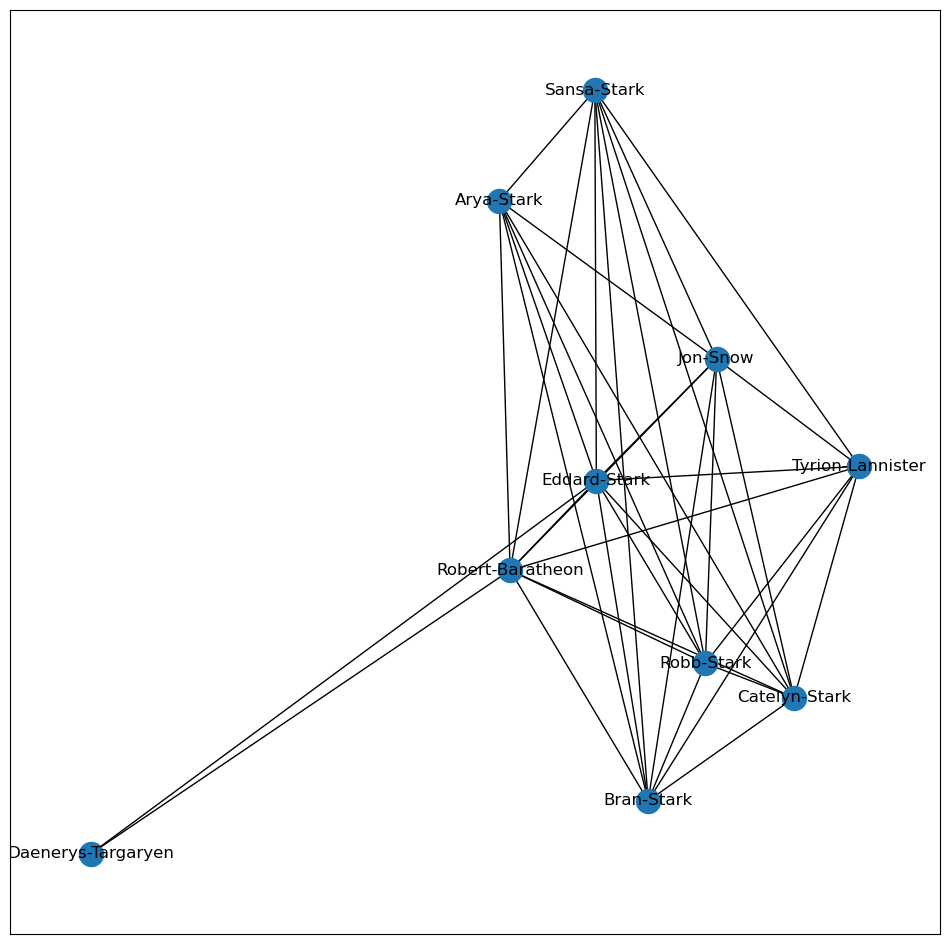

In [16]:
top_characters_centrality_1= [character for character, degree in sorted_centrality_1]
subgraph_centrality_1 = graph1.subgraph(top_characters_centrality_1)

plt.figure(figsize=(12, 12))
nx.draw_networkx(subgraph_centrality_1, with_labels=True)
plt.show()

For the graph above, I just showed the graph for inverse weighted one(as I use sorted_centrality_1 for all three cases). For simplicity, I don't show thr graph fot other two. They are basically the same thing.

In [17]:
# Calculate the betweenness centrality of each character for all 5 Books
#Inverse weighted
for u, v, data in G_all.edges(data=True):
    data['distance'] = 1 / data['weight']

centrality_all = nx.betweenness_centrality(G_all, weight='distance')

sorted_centrality_all = sorted(centrality_all.items(), key=lambda item: item[1], reverse=True)[:10]

for character, centrality in sorted_centrality_all:
    print(f'{character}: {centrality}')

Jon-Snow: 0.4528420702438097
Tyrion-Lannister: 0.4346572036605781
Stannis-Baratheon: 0.2068722969440616
Daenerys-Targaryen: 0.19769260016158927
Eddard-Stark: 0.15687546536127878
Arya-Stark: 0.12140107409343663
Barristan-Selmy: 0.09566402103829032
Robb-Stark: 0.09324070993668447
Jaime-Lannister: 0.09190601418394774
Theon-Greyjoy: 0.08656036626903031


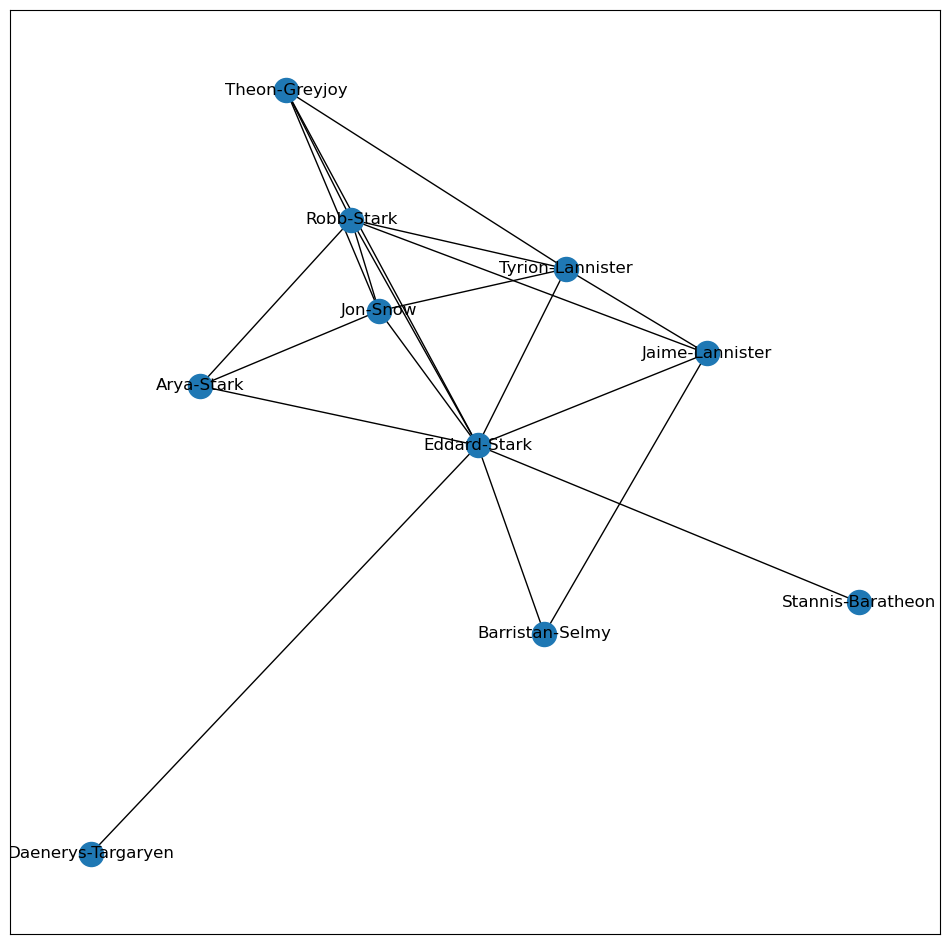

In [18]:
top_characters_centrality_all= [character for character, degree in sorted_centrality_all]
subgraph_centrality_all = graph1.subgraph(top_characters_centrality_all)

plt.figure(figsize=(12, 12))
nx.draw_networkx(subgraph_centrality_all, with_labels=True)
plt.show()

For all 5 books cases, for simplicity, I don't calculate the case for unweighted one and weighted one. We only need to change graph1 to G_all from the above code. 

### Question 9
Run the girvan newman algorithm and visualize the graph of each community (top 5 important characters of each community). Do the communities make sense from a story perspective ?

In [110]:
from networkx.algorithms.community.centrality import girvan_newman

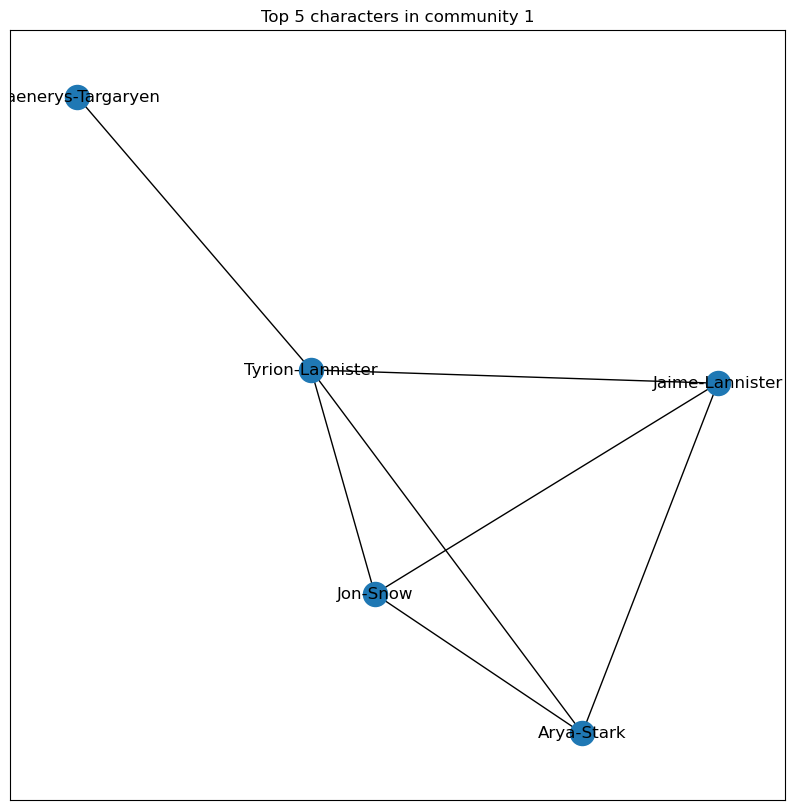

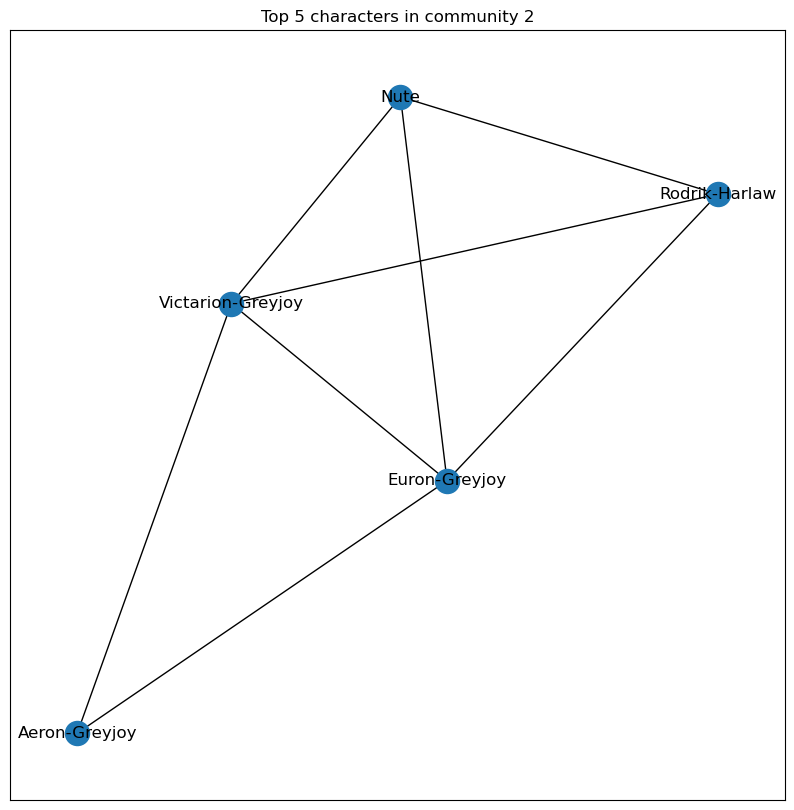

In [111]:
communities = girvan_newman(G_all)

first_communities = next(communities)

for i, community in enumerate(first_communities, start=1):
    community_list = list(community)
    subgraph = G_all.subgraph(community_list)

    degree_weighted = subgraph.degree(weight='weight')
    sorted_degree_weighted = sorted(degree_weighted, key=lambda item: item[1], reverse=True)[:5]


    top_characters = [character for character, degree in sorted_degree_weighted]
    subgraph_top_characters = subgraph.subgraph(top_characters)

    plt.figure(figsize=(10, 10))
    plt.title(f'Top 5 characters in community {i}')
    nx.draw_networkx(subgraph_top_characters, with_labels=True)
    plt.show()


I am sorry but admittedly, I didn't read Game of Thrones ever. I just viewed thw Wikipedia and a picture showing the relationship and make the biased conclusion: Jon snow is considered to be the son of New Stark, who is the father of other three, so it kind of make sense. For the second graph, Greyjoy is also a community in the book. 